In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [2]:
df=pd.read_csv('C:/Users/Rahul/Downloads/heart-disease-prediction-using-logistic-regression/framingham.csv')

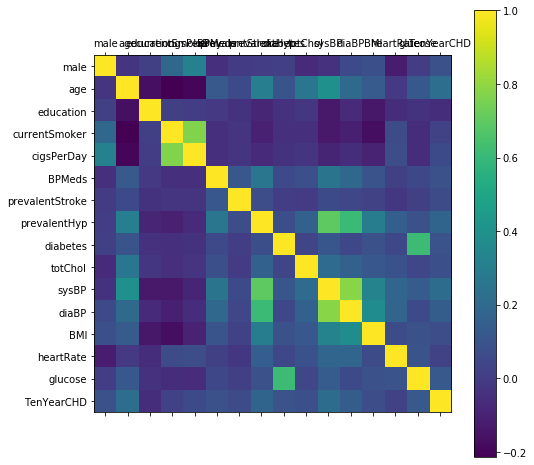

In [3]:
rcParams['figure.figsize'] = 20, 8
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [4]:
df.dropna(inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
male               3656 non-null int64
age                3656 non-null int64
education          3656 non-null float64
currentSmoker      3656 non-null int64
cigsPerDay         3656 non-null float64
BPMeds             3656 non-null float64
prevalentStroke    3656 non-null int64
prevalentHyp       3656 non-null int64
diabetes           3656 non-null int64
totChol            3656 non-null float64
sysBP              3656 non-null float64
diaBP              3656 non-null float64
BMI                3656 non-null float64
heartRate          3656 non-null float64
glucose            3656 non-null float64
TenYearCHD         3656 non-null int64
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Text(0.5, 1.0, 'Count of each Target Class')

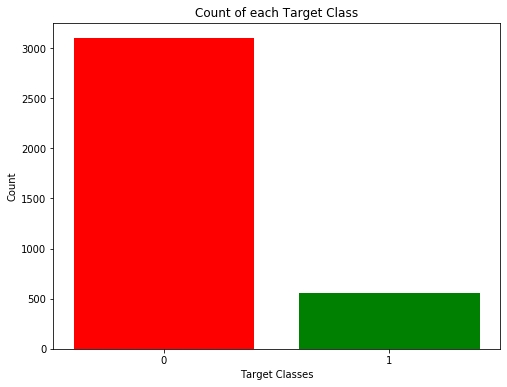

In [5]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['TenYearCHD'].unique(), df['TenYearCHD'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [6]:
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

In [7]:
from sklearn import preprocessing 
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
X = min_max_scaler.fit_transform(X)

In [8]:
y=y.to_numpy()
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [9]:
clf1 = KNeighborsClassifier(n_neighbors = 5)
#clf1.fit(X_train, y_train)
#clf1.score(X_test, y_test)

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)    


In [11]:
clf2 = SVC(kernel = 'sigmoid',probability=True,gamma='scale')
#clf2.fit(X_train, y_train)
#clf2.score(X_test, y_test)

In [12]:
clf3 = DecisionTreeClassifier(max_features = 10,random_state = 100)
#clf3.fit(X_train, y_train)
#clf3.score(X_test, y_test)

In [13]:
clf4 = RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 0)
#clf4.fit(X_train, y_train)
#clf4.score(X_test, y_test)
#rf_scores.append(rf_classifier.score(X_test, y_test))

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

labels = ['K Neighbours', 'SVC','Decision Trees','Random Forest']
s=[]
for clf, label in zip([clf1, clf2, clf3,clf4], labels):

    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    s.append(scores.mean())

Accuracy: 0.83 (+/- 0.01) [K Neighbours]
Accuracy: 0.77 (+/- 0.01) [SVC]
Accuracy: 0.76 (+/- 0.01) [Decision Trees]
Accuracy: 0.85 (+/- 0.00) [Random Forest]


In [30]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2],clf3),
                                                 (labels[3], clf4)],
                                   voting = 'hard')

In [31]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3),
                                                 (labels[3], clf4)],
                                   voting = 'soft')

In [17]:
labels_new = ['K Neighbours', 'SVC','Decision Trees','Random Forest',
              'Voting_Classifier_Hard','soft']
#scoress=[]
#for (clf, label) in zip([clf1, clf2, clf3,clf4, ], labels_new):
#scores =
scores=cross_val_score(voting_clf_hard, X, y, cv=5,scoring='accuracy')
print(scores)
s.append(scores.mean())
#print(scores)
#scoress.append(scores.mean())

[0.84153005 0.84016393 0.85225718 0.84815321 0.85068493]


In [18]:
scores=cross_val_score(voting_clf_soft, X, y, cv=5,scoring='accuracy')
print(scores)
s.append(scores.mean())

[0.84153005 0.8442623  0.8495212  0.84404925 0.84383562]


In [19]:
#scoress
#np.mean([0.84699454, 0.84836066, 0.8495212 , 0.84815321, 0.84931507])

Text(0.5, 1.0, 'Accuracy score for different algorithms')

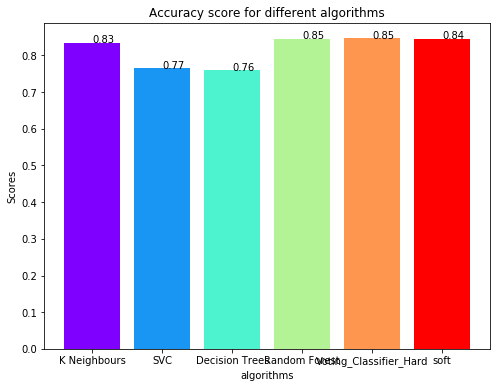

In [20]:
from matplotlib.cm import rainbow

colors = rainbow(np.linspace(0, 1, len(s)))
plt.bar(labels_new, s, color = colors)
#for i in range(len(labels_new)):
 #  plt.text(i, svc_scores[i], svc_scores[i])
for i in range(len(labels_new)):
    plt.text(i, s[i],  round(s[i],2))
plt.xlabel('algorithms')
plt.ylabel('Scores')
plt.title('Accuracy score for different algorithms')

In [21]:
#voting_clf_soft.fit(X_train,y_train)

In [22]:
#pred=pred=voting_clf_soft.predict(X_test)

In [23]:
#from sklearn.metrics import accuracy_score

In [24]:
#accuracy_score(pred,y_test)

In [25]:
X[0]

array([1.        , 0.18421053, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16837782,
       0.10638298, 0.23280423, 0.27702375, 0.36363636, 0.10451977])

In [26]:
from sklearn.model_selection import cross_val_predict
h=cross_val_predict(clf1, X[:20,:],y[:20], cv=5)

c:\users\rahul\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [27]:
print(h)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
y[:20]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y[:20],h)

0.8